##### Machine Learning Course Project
# Exploratory Data Analysis
##### Darryl Abraham, Riccardo Paciello

### Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import MinCovDet
from sklearn.impute import SimpleImputer

### Loading the Data

In [47]:
df = pd.read_csv('./data/cup98LRN.txt', sep = ',', chunksize=10000, low_memory=False)
df = pd.concat(df, axis='rows')

In [48]:
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


### Univariate Data Analysis

In [51]:
df.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

In [52]:
df.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [53]:
# Number of missing values per feature
abs_null = df.isna().sum()
rel_null = df.isna().sum()/len(df)
pd.concat([abs_null, rel_null], axis=1, keys=['Absolute', 'Relative'])

,Absolute,Relative
ODATEDW,0,0.000000
OSOURCE,0,0.000000
TCODE,0,0.000000
STATE,0,0.000000
ZIP,0,0.000000
...,...,...
MDMAUD_R,0,0.000000
MDMAUD_F,0,0.000000
MDMAUD_A,0,0.000000
CLUSTER2,132,0.001383


In [54]:
# Number of modalities per feature
modalities = df.nunique()
modalities

ODATEDW        54
OSOURCE       896
TCODE          55
STATE          57
ZIP         19938
            ...  
MDMAUD_R        5
MDMAUD_F        4
MDMAUD_A        5
CLUSTER2       62
GEOCODE2        5
Length: 481, dtype: int64

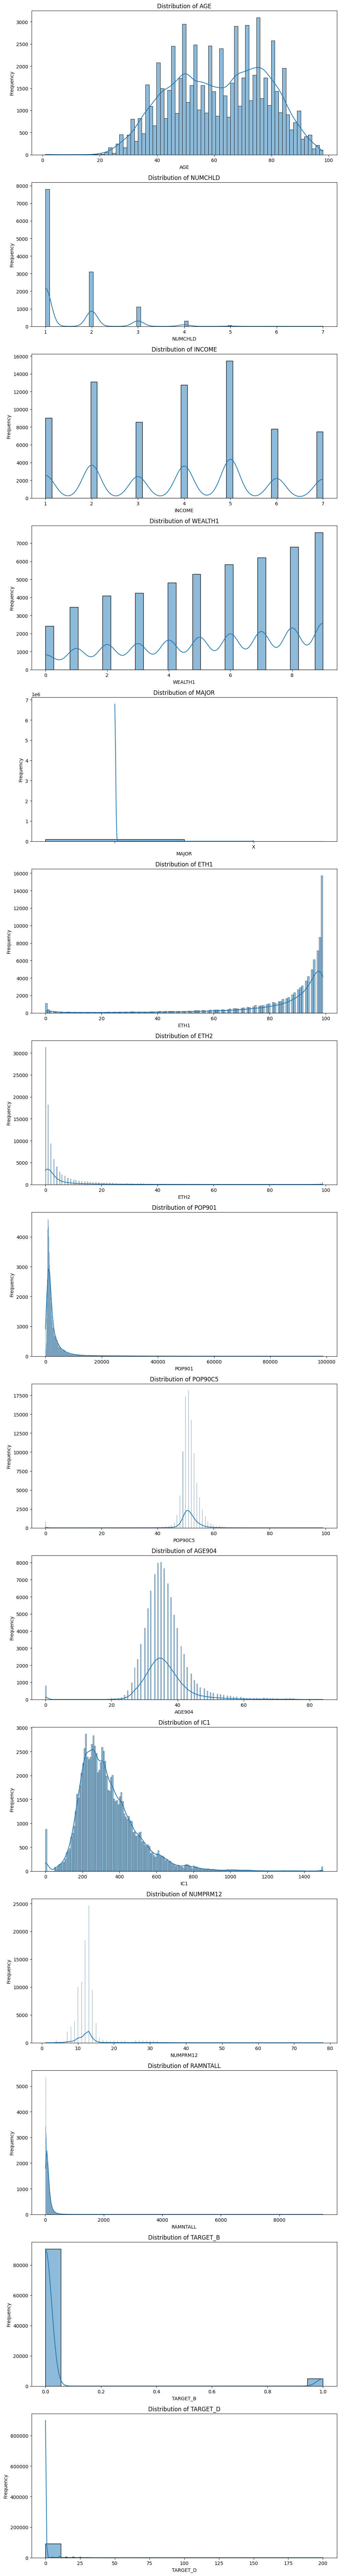

In [67]:
# Plotting the distribution of the columns
# Select columns to plot:
columns_to_plot = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MAJOR', 'ETH1', 'ETH2', 'POP901', 'POP90C5', 'AGE904', 'IC1', 'NUMPRM12', 'RAMNTALL', 'TARGET_B', 'TARGET_D']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 5*len(columns_to_plot)))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
#plt.savefig('./figures/feature_distributions.png', bbox_inches='tight')
plt.show()

### Multivariate Data Analysis

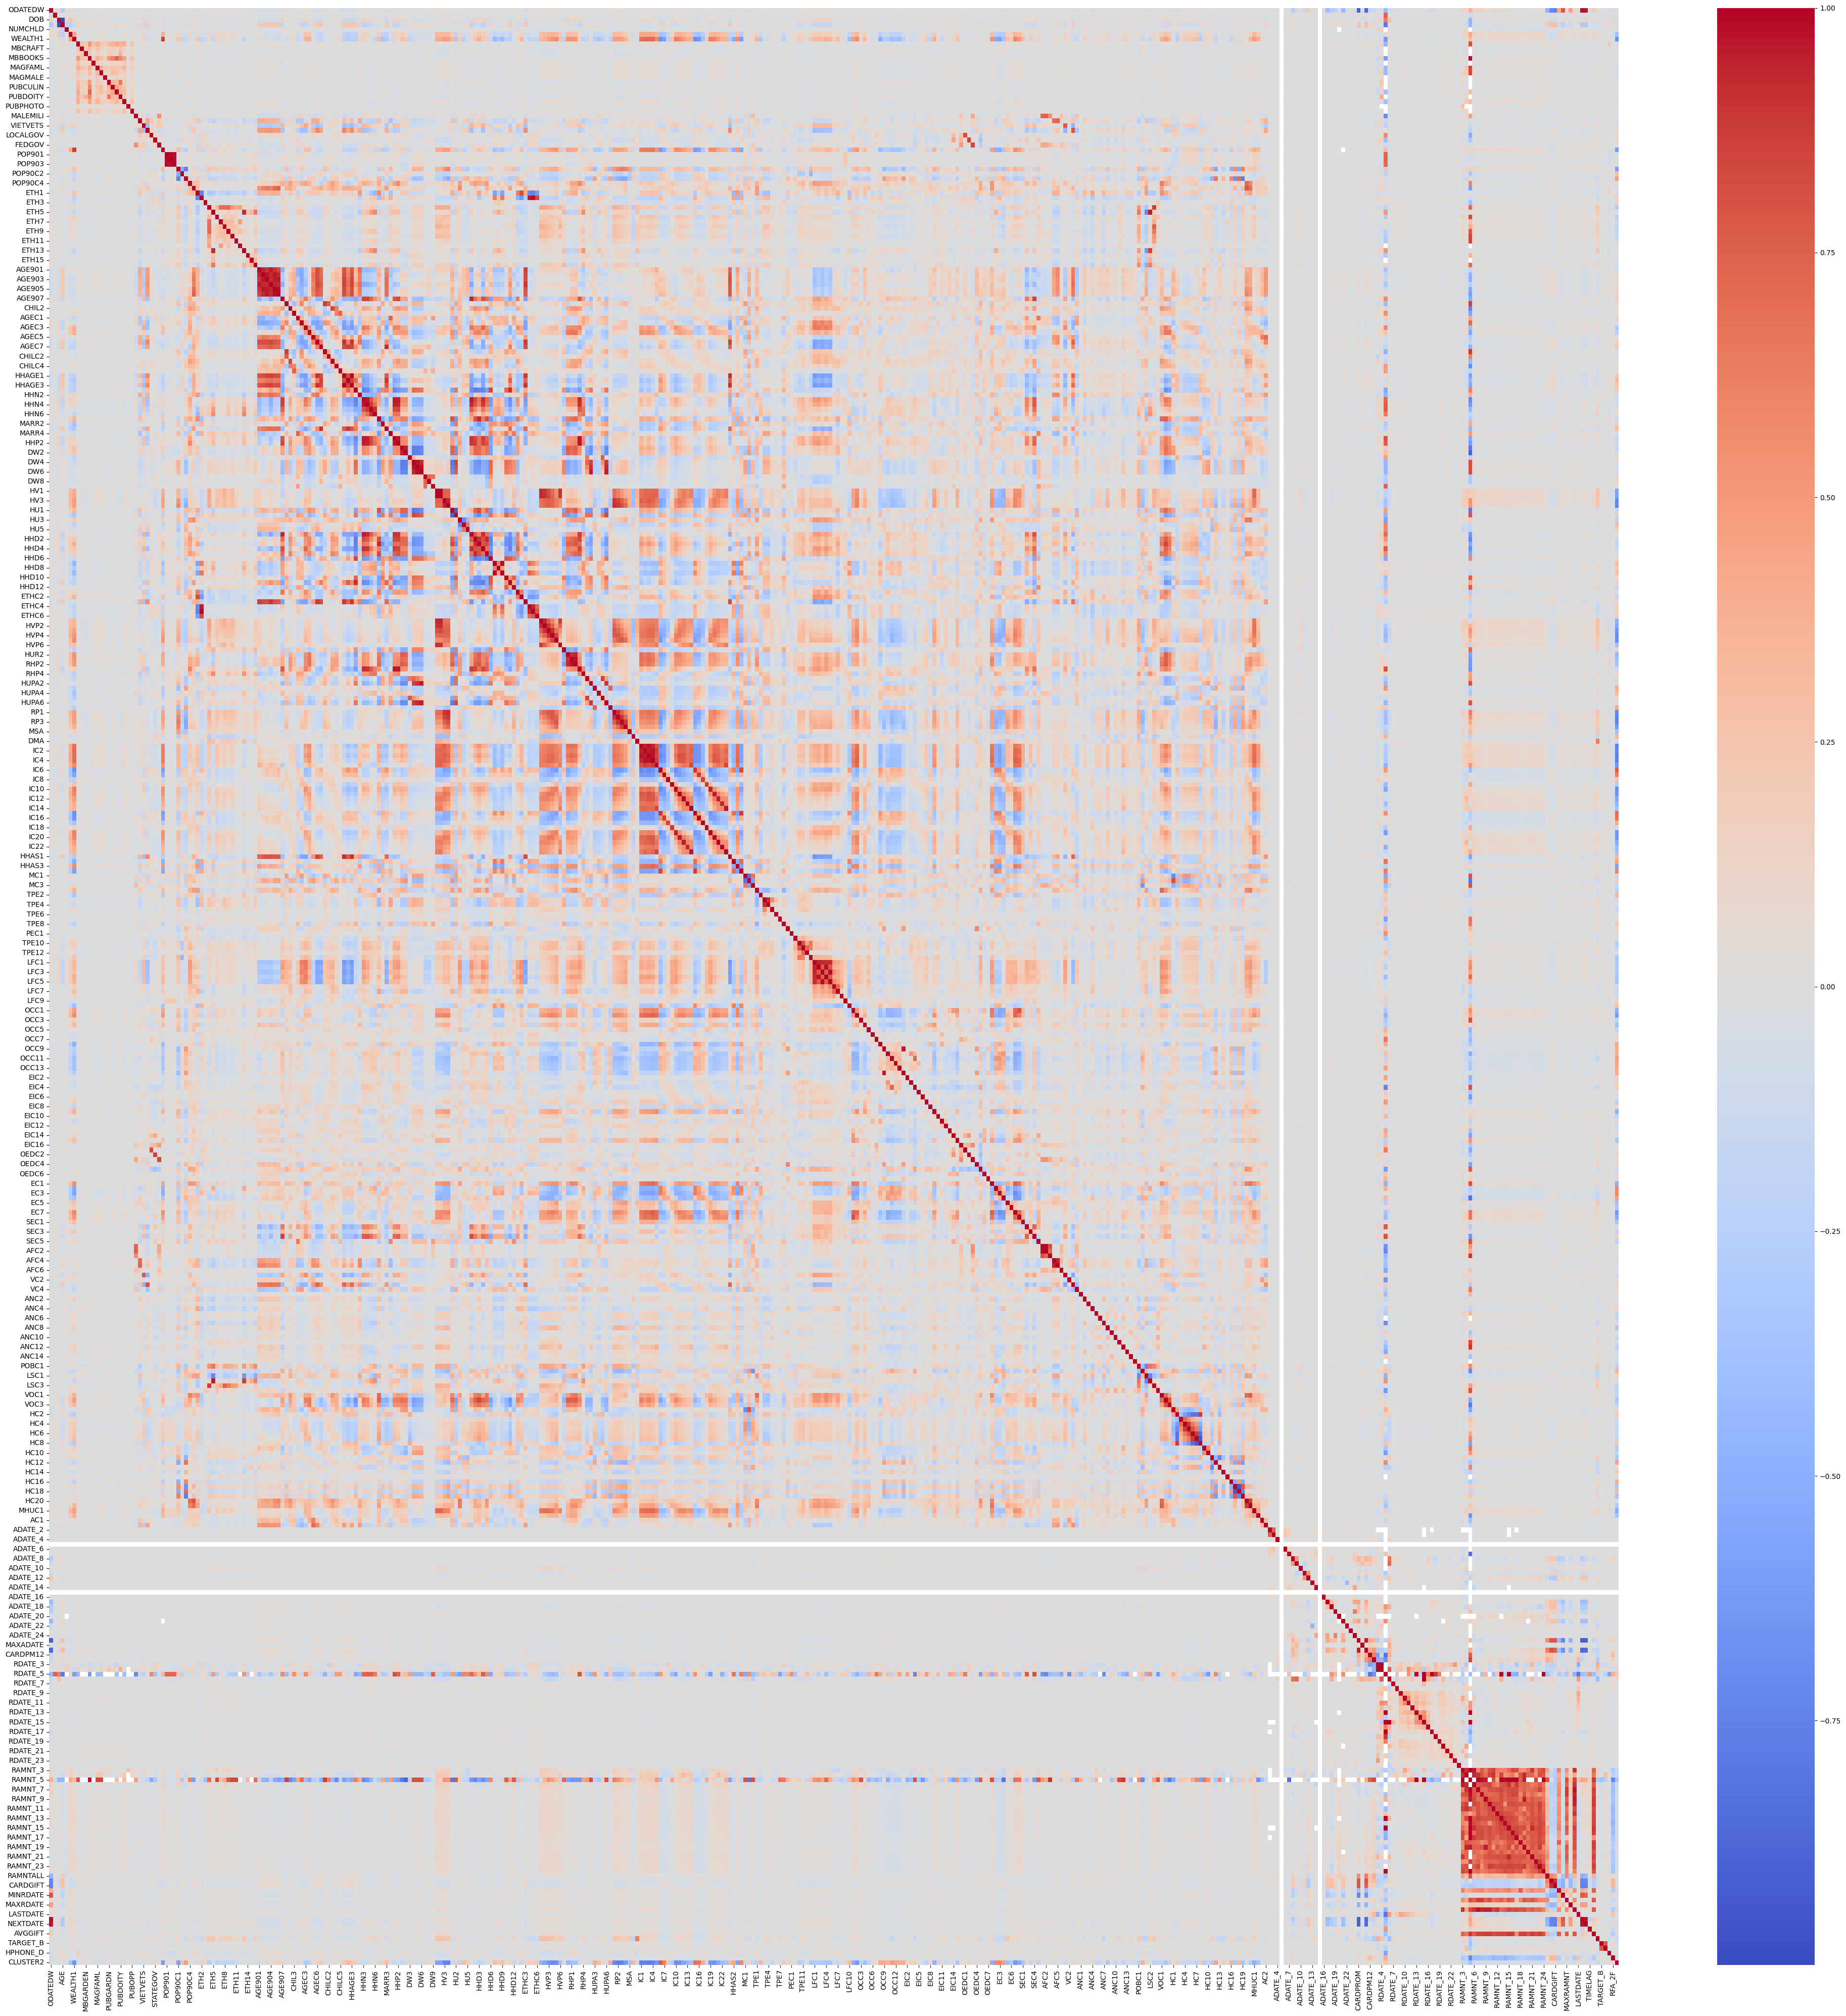

In [68]:
# Plot correlations
plt.figure(figsize=(40, 40))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False, cmap='coolwarm')
plt.tight_layout()
#plt.savefig('./figures/correlation_matrix.png', bbox_inches='tight')
plt.show()

### Outlier Detection

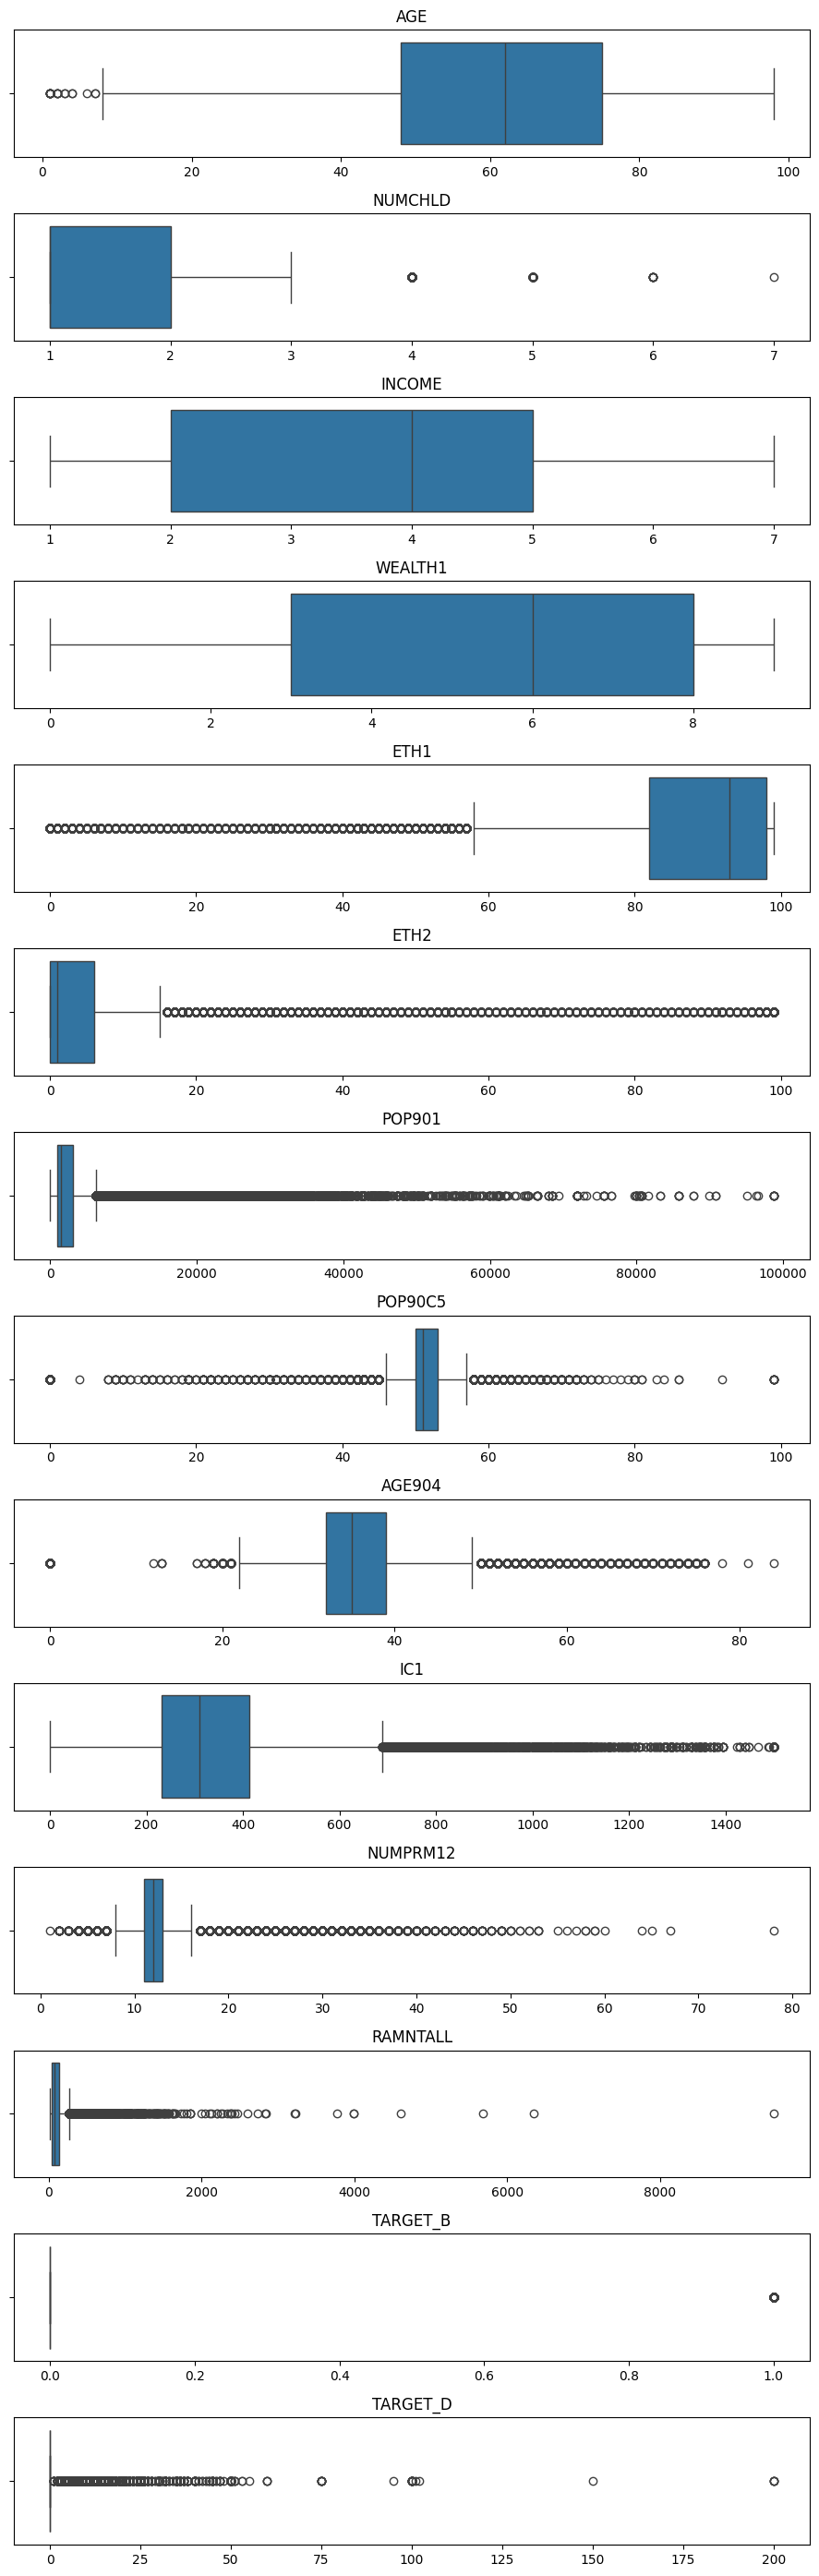

In [72]:
# Visualizing outliers
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(9, 2 * len(columns_to_plot)))

# Individual boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
#plt.savefig('boxplots.png') 
plt.show()

In [73]:
# Univariate outlier detection using IQR
uni_outliers = {}
df_num = df.select_dtypes(include=['number'])
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    uni_outliers[col] = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)].index
uni_outliers

{'ODATEDW': Index([], dtype='int64'),
 'TCODE': Index([   18,    32,    53,    54,    57,    65,   122,   126,   127,   129,
        ...
        95293, 95311, 95312, 95328, 95368, 95385, 95386, 95387, 95401, 95405],
       dtype='int64', length=10590),
 'DOB': Index([], dtype='int64'),
 'AGE': Index([], dtype='int64'),
 'NUMCHLD': Index([12687, 15043, 37107, 52817, 55505, 55714, 84553, 94244], dtype='int64'),
 'INCOME': Index([], dtype='int64'),
 'WEALTH1': Index([], dtype='int64'),
 'HIT': Index([    1,     4,    12,    14,    32,    39,    64,    89,   102,   110,
        ...
        95307, 95310, 95311, 95332, 95350, 95357, 95372, 95387, 95393, 95396],
       dtype='int64', length=7663),
 'MBCRAFT': Index([    4,    12,    24,    27,    39,    44,   156,   185,   198,   209,
        ...
        95191, 95250, 95271, 95301, 95307, 95311, 95329, 95335, 95350, 95388],
       dtype='int64', length=4851),
 'MBGARDEN': Index([   12,    27,    39,   156,   231,   242,   289,   311,   332,  

In [89]:
# Multivariate outlier detection using Mahalanobis distance
"""
imputer = SimpleImputer(strategy='mean')
df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
mcd = MinCovDet()
mcd.fit(df_num_imputed.dropna())
mahalanobis = mcd.mahalanobis(df_num_imputed.dropna())
mahalanobis_series = pd.Series(mahalanobis)
multi_outliers = df_num_imputed[mahalanobis > mahalanobis_series.quantile(0.99)].index
multi_outliers
"""

Index([   35,   100,   183,   262,   399,   522,   577,   640,   751,   945,
       ...
       94752, 94754, 95019, 95071, 95107, 95183, 95197, 95212, 95213, 95247],
      dtype='int64', length=955)

In [88]:
# Save the outliers to a file (to not recompute them every time)
"""
f = open("./data/multiout.txt", "a")
f.write(str(multi_outliers.values.tolist()))
f.close()
"""